In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.autograd import Variable


In [8]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim =1)
y = x.pow(3) +0.1*torch.randn(x.size())

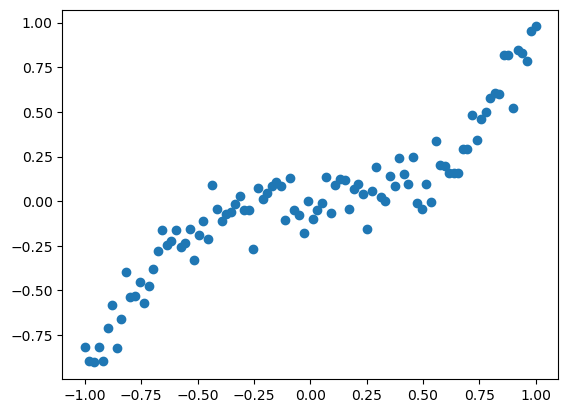

In [34]:
x,y = (Variable(x),Variable(y))
plt.scatter(x.data,y.data)
plt.show()

from IPython import display

x_list = []
y_list = []

y_predlist =[]
x_input =[]
def paintloss(loss,it):
    #plt.scatter(x.data.numpy(), y.data.numpy())
    #plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r-', lw=5)
    x_list.append(it)
    y_list.append(loss)
    display.clear_output(wait=True)
    plt.plot(x_list, y_list)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    #plt.pause(0.1)    
    
def paintpred(pred):
    print(pred)
    #x_input.append(x)
    y_predlist.append(pred)
    display.clear_output(wait=True)
    plt.plot(x.data, y_predlist)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    #plt.pause(0.1)      

In [35]:
class Net(torch.nn.Module):
    def __init__(self,n_input,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden1 = torch.nn.Linear(n_input,n_hidden)
        self.hidden2 = torch.nn.Linear(n_hidden,n_hidden)
        self.predict = torch.nn.Linear(n_hidden,n_output)
        
    def forward(self,input):
        out = self.hidden1(input)
        out = F.relu(out)
        out = self.hidden2(out)
        out = F.sigmoid(out)
        out = self.predict(out)
        return out
    

In [36]:
net = Net(1,20,1)
print(net)

Net(
  (hidden1): Linear(in_features=1, out_features=20, bias=True)
  (hidden2): Linear(in_features=20, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
)


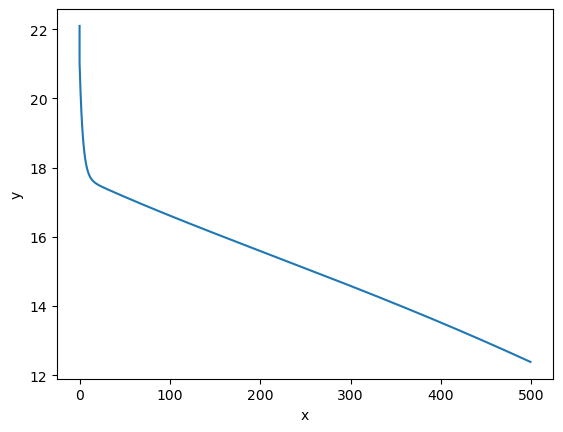

In [38]:
learning_rate = 1e-4
optimizer = torch.optim.SGD(net.parameters(),lr =learning_rate)

loss_func = nn.MSELoss(reduction = 'sum')

for t in range(500):
    y_pred =net(x)
    loss =loss_func(y_pred,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    y_predlist.append(y_pred)
    paintloss(loss.item(),t)
    #paintpred( y_pred.detach().numpy())
    
    
    
    
    
    

In [1]:
plt.scatter(y_predlist,x) 
plt.show()

NameError: name 'plt' is not defined

In [40]:
x2 = torch.unsqueeze(torch.linspace(-1,1,100),dim =1)

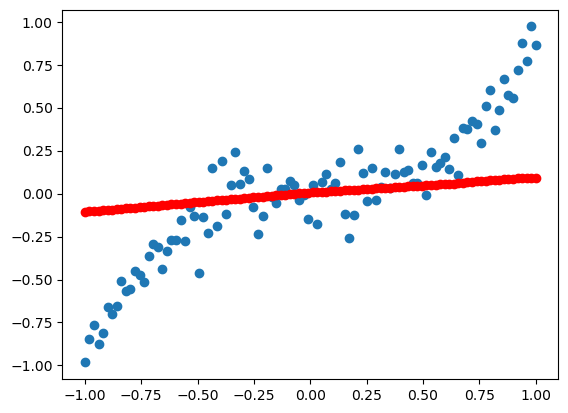

In [41]:
y_preds=net(x2)
y2 = x.pow(3) +0.1*torch.randn(x.size())
x2,y_preds = (Variable(x2),Variable(y_preds))
plt.scatter(x2,y2)
plt.scatter(x2.data,y_preds.data,c='red')
plt.show()
